# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

In [2]:
airline=pd.read_csv('/kaggle/input/airline-passenger-satisfaction/airline_passenger_satisfaction.csv')

# Exploring Data 

In [3]:
airline.head(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,4,3,3,4,4,4,4,Satisfied
6,7,Male,43,Returning,Business,Business,1963,0,0.0,3,...,5,5,5,4,5,5,3,5,5,Satisfied
7,8,Female,60,Returning,Business,Business,853,0,3.0,3,...,3,4,4,4,4,3,4,3,3,Satisfied
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,...,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied
9,10,Female,38,Returning,Business,Business,2822,13,0.0,2,...,5,4,5,4,2,5,2,5,5,Satisfied


In [4]:
airline.shape

(129880, 24)

In [5]:
airline.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

# Checking Null Values

In [7]:
airline.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

<Figure size 720x432 with 0 Axes>

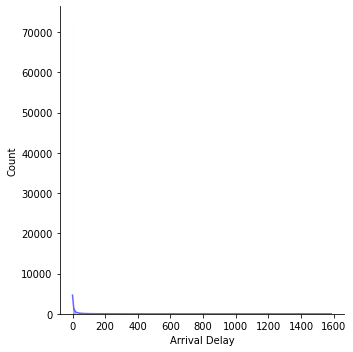

In [8]:
plt.figure(figsize = (10,6))
sns.displot(data=airline,x='Arrival Delay',kde=True,color='#6666FF')

In [9]:
fill_list = airline['Arrival Delay'].dropna()
airline['Arrival Delay'] = airline['Arrival Delay'].fillna(pd.Series(np.random.choice(fill_list , size = len(airline.index))))
# airline['Arrival Delay'].fillna(airline['Departure Delay'], inplace = True)

<Figure size 720x432 with 0 Axes>

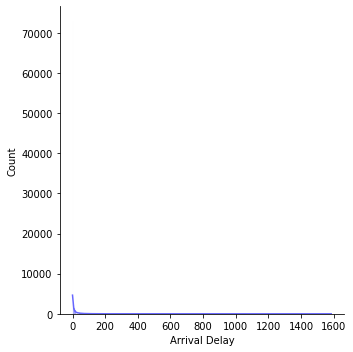

In [10]:
plt.figure(figsize = (10,6))
sns.displot(data=airline,x='Arrival Delay',kde=True,color='#6666FF')

### filling null values didn't change the distribution

In [11]:
airline.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [12]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129880 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

# Exploratory Data Analysis (EDA)

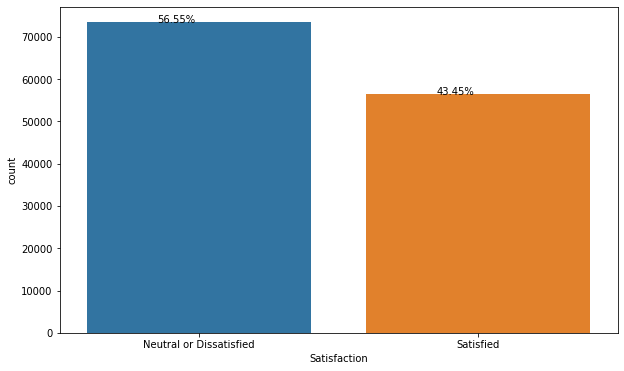

In [13]:
plt.figure(figsize = (10,6))
x=sns.countplot(data=airline,x='Satisfaction')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/airline.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

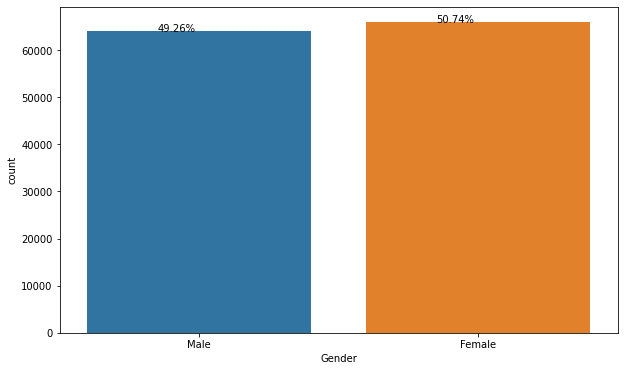

In [14]:
plt.figure(figsize = (10,6))
x=sns.countplot(data=airline,x='Gender')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/airline.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

### Nearly the same percentage of males and females

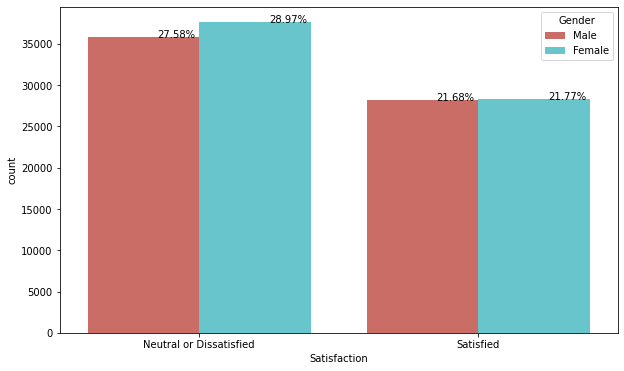

In [15]:
plt.figure(figsize = (10,6))
x=sns.countplot(data=airline,x='Satisfaction',hue='Gender',palette='hls')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/airline.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

### The gender doesn't affect the passengers' satisfaction 

<AxesSubplot:xlabel='Customer Type', ylabel='count'>

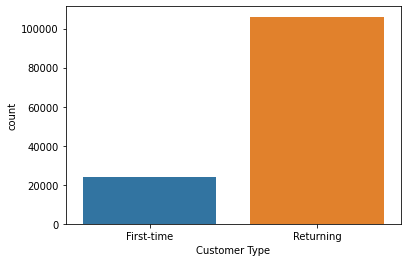

In [16]:
sns.countplot(data=airline,x='Customer Type')

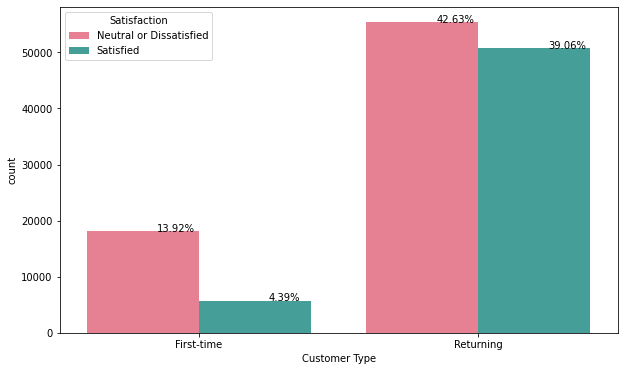

In [17]:
plt.figure(figsize = (10,6))
x=sns.countplot(data=airline,x='Customer Type',hue='Satisfaction',palette='husl')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/airline.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()
# difference between dissatsified first_time customers and satsified first_time customers is 9.53
# while difference between dissatsified returning customers and satsified returning customers is hust 3.57

### First_time customers tend to be dissatisfied a little bit more than returning customers

<Figure size 720x432 with 0 Axes>

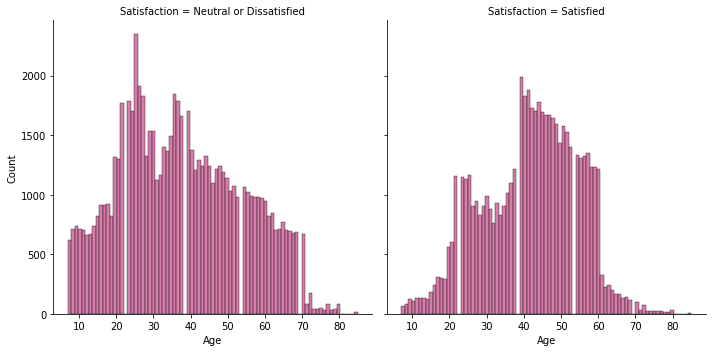

In [18]:
plt.figure(figsize = (10,6))
sns.displot(data=airline,x='Age',col='Satisfaction',color='#c6538c')
plt.show()

### people aged from 20 to 30 and 33 to 40  tend to be more dissatisfied while people aged from 40 to 60 tend to be more satisfied
### customers aged between 60 and 70 tend to be more disatsfied 

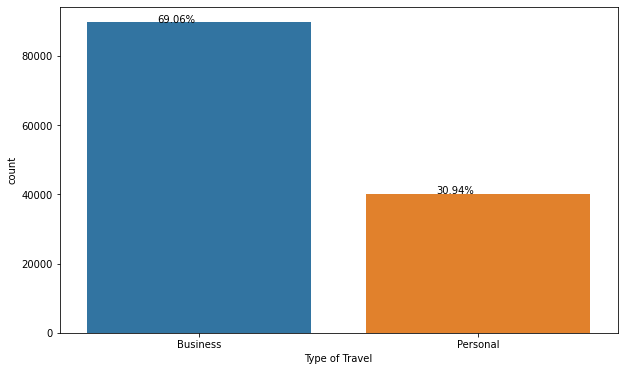

In [19]:
plt.figure(figsize = (10,6))
x=sns.countplot(data=airline,x='Type of Travel')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/airline.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

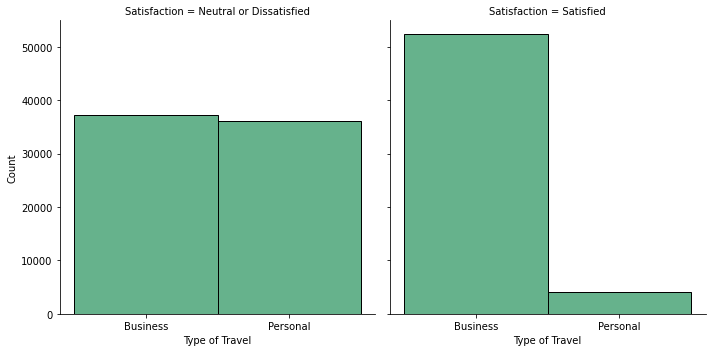

In [20]:
sns.displot(data=airline,x='Type of Travel',col='Satisfaction',color='#339966')

### Customers who have business type of travel tend to be way more satisfied than those who have personal type of travel 

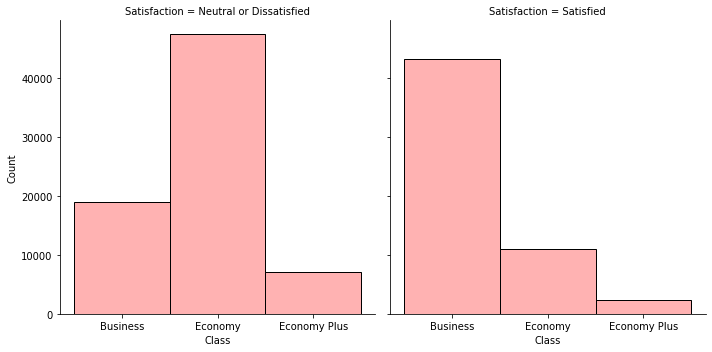

In [21]:
sns.displot(data=airline,x='Class',col='Satisfaction',color='#ff9999')


### Most of the dissatisfied people had economy class while most of the satisfied people had business class

In [22]:
airline.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

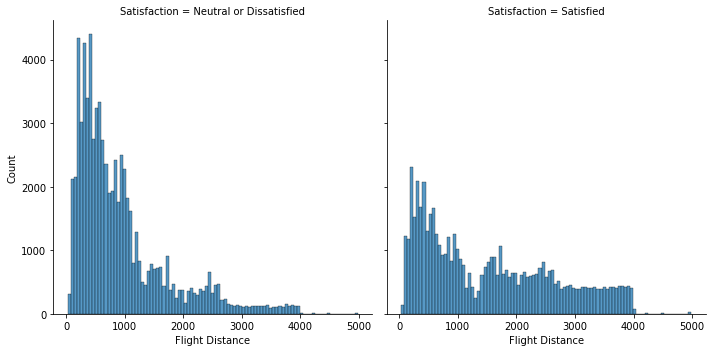

In [23]:
sns.displot(data=airline,x='Flight Distance',col='Satisfaction')

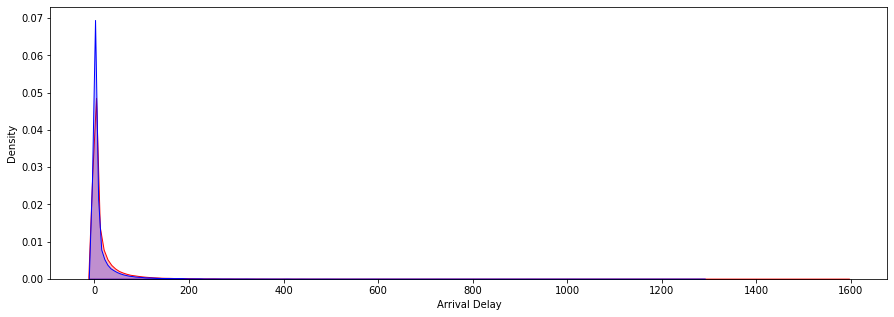

In [24]:
fig = plt.figure(figsize=(15,5))
ax=sns.kdeplot(airline.loc[(airline['Satisfaction'] == 'Neutral or Dissatisfied'), 'Arrival Delay'] , color='r',shade=True)
ax=sns.kdeplot(airline.loc[(airline['Satisfaction'] == 'Satisfied'),'Arrival Delay'] , color='b',shade=True)

### The two distributions are nearly the same

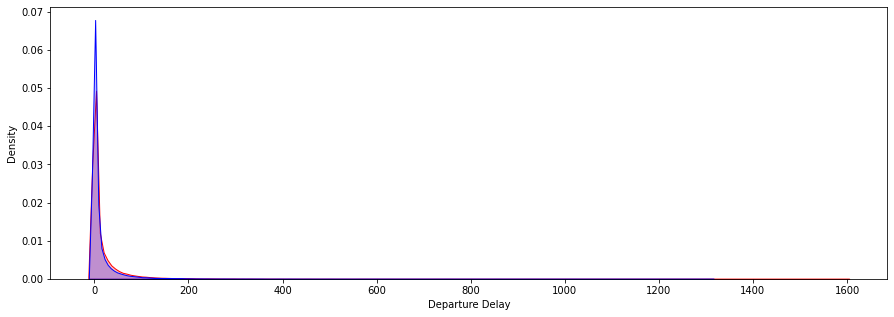

In [25]:
fig = plt.figure(figsize=(15,5))
ax=sns.kdeplot(airline.loc[(airline['Satisfaction'] == 'Neutral or Dissatisfied'), 'Departure Delay'] , color='r',shade=True)
ax=sns.kdeplot(airline.loc[(airline['Satisfaction'] == 'Satisfied'),'Departure Delay'] , color='b',shade=True)

### The two distributions are nearly the same

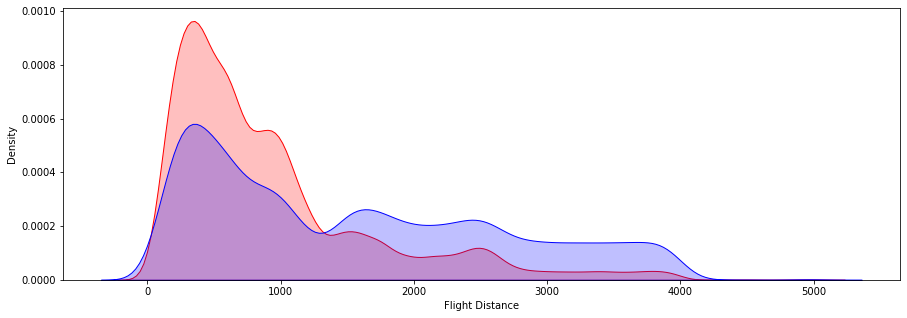

In [26]:
fig = plt.figure(figsize=(15,5))
ax=sns.kdeplot(airline.loc[(airline['Satisfaction'] == 'Neutral or Dissatisfied'), 'Flight Distance'] , color='r',shade=True)
ax=sns.kdeplot(airline.loc[(airline['Satisfaction'] == 'Satisfied'),'Flight Distance'] , color='b',shade=True)

<AxesSubplot:xlabel='Ease of Online Booking', ylabel='count'>

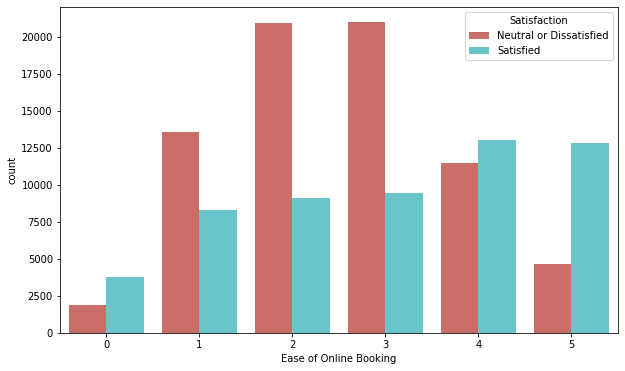

In [27]:
plt.figure(figsize = (10,6))
sns.countplot(data=airline,x='Ease of Online Booking',hue='Satisfaction',palette='hls')

<AxesSubplot:xlabel='Check-in Service', ylabel='count'>

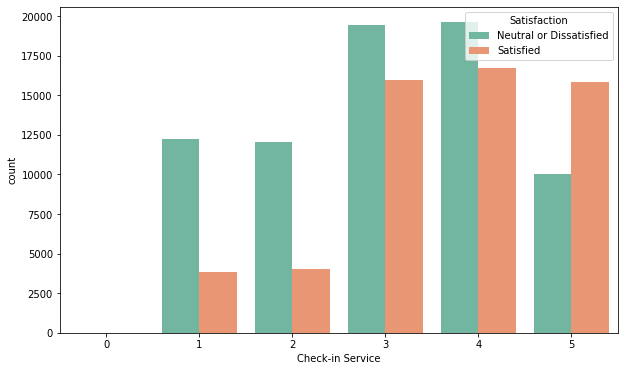

In [28]:
plt.figure(figsize = (10,6))
sns.countplot(data=airline,x='Check-in Service',hue='Satisfaction',palette='Set2')

<AxesSubplot:xlabel='Online Boarding', ylabel='count'>

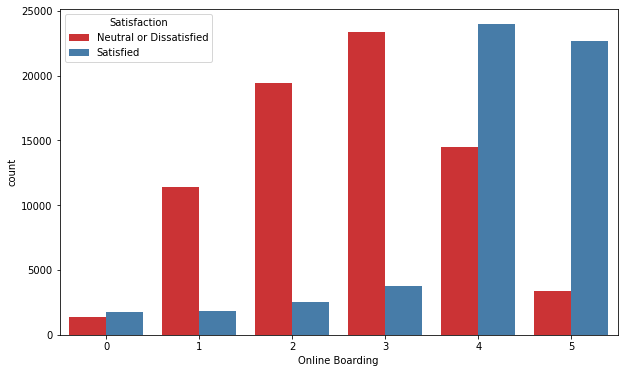

In [29]:
plt.figure(figsize = (10,6))
sns.countplot(data=airline,x='Online Boarding',hue='Satisfaction',palette='Set1')

<AxesSubplot:xlabel='Gate Location', ylabel='count'>

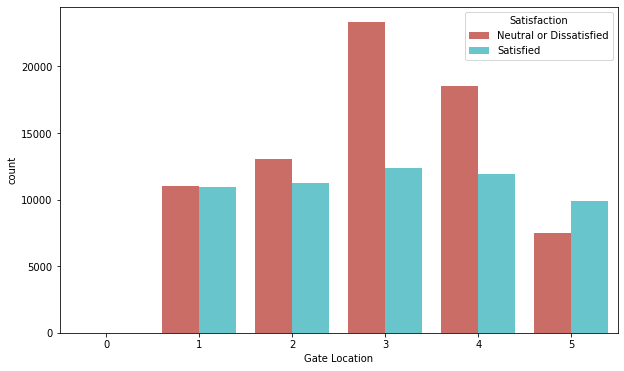

In [30]:
plt.figure(figsize = (10,6))
sns.countplot(data=airline,x='Gate Location',hue='Satisfaction',palette='hls')

### satsfaction level of gate location doesn't seem to affect satisfaction level of the airline

<AxesSubplot:xlabel='On-board Service', ylabel='count'>

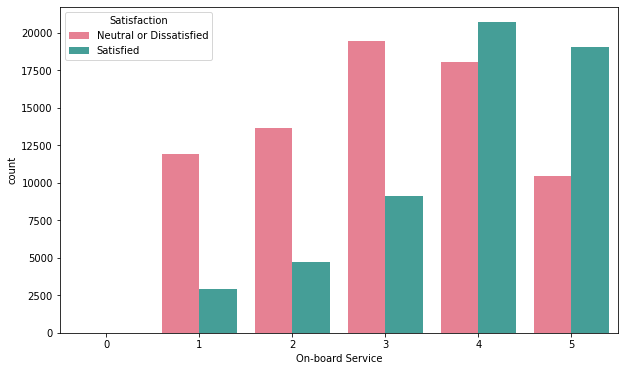

In [31]:
plt.figure(figsize = (10,6))
sns.countplot(data=airline,x='On-board Service',hue='Satisfaction',palette='husl')

### The more satisfied the customer with On-board Service the more satisfied with the airline 

<AxesSubplot:xlabel='Seat Comfort', ylabel='count'>

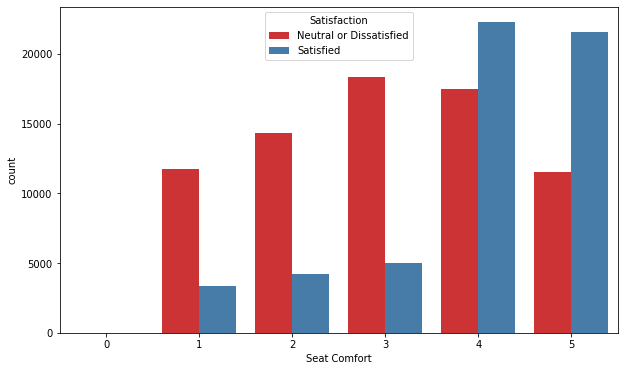

In [32]:
plt.figure(figsize = (10,6))
sns.countplot(data=airline,x='Seat Comfort',hue='Satisfaction',palette='Set1')

### The more satisfied the customer with Seat Comfort the more satisfied with the airline 

<AxesSubplot:xlabel='Leg Room Service', ylabel='count'>

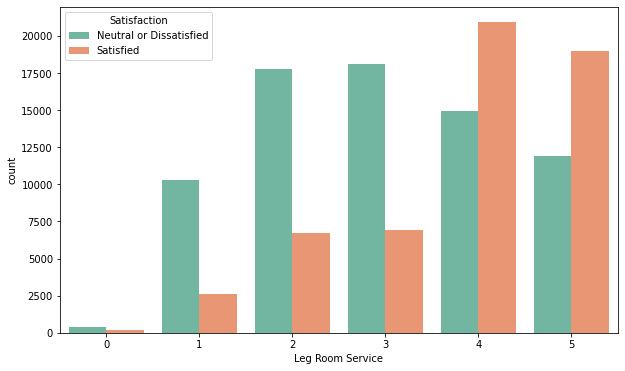

In [33]:
plt.figure(figsize = (10,6))
sns.countplot(data=airline,x='Leg Room Service',hue='Satisfaction',palette='Set2')

### The more satisfied the customer with Leg Room Service the more satisfied with the airline 

<AxesSubplot:xlabel='Cleanliness', ylabel='count'>

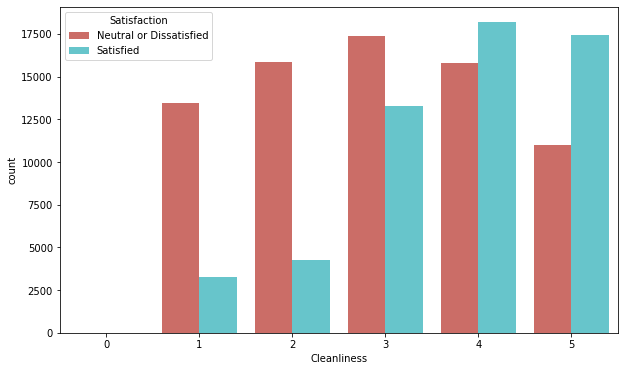

In [34]:
plt.figure(figsize = (10,6))
sns.countplot(data=airline,x='Cleanliness',hue='Satisfaction',palette='hls')

### The more satisfied the customer with Cleanliness the more satisfied with the airline 

<AxesSubplot:xlabel='Food and Drink', ylabel='count'>

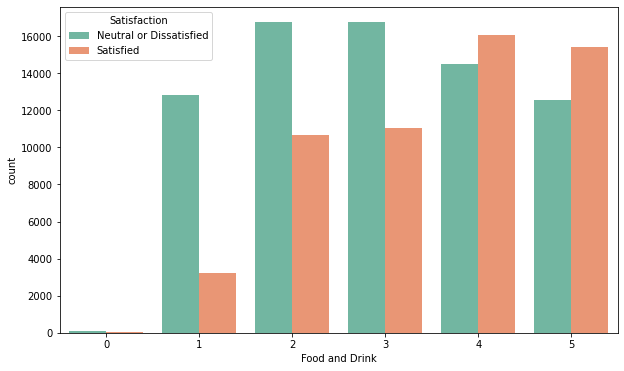

In [35]:
plt.figure(figsize = (10,6))
sns.countplot(data=airline,x='Food and Drink',hue='Satisfaction',palette='Set2')

### The more satisfied the customer with Food and Drink the more satisfied with the airline 

<AxesSubplot:xlabel='In-flight Service', ylabel='count'>

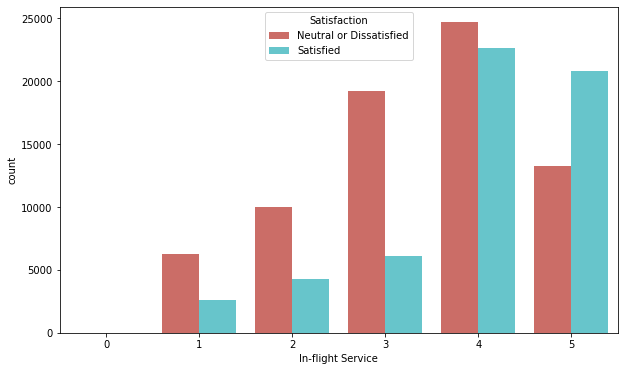

In [36]:
plt.figure(figsize = (10,6))
sns.countplot(data=airline,x='In-flight Service',hue='Satisfaction',palette='hls')

### The more satisfied the customer with In-flight Service the more satisfied with the airline 

<AxesSubplot:xlabel='In-flight Wifi Service', ylabel='count'>

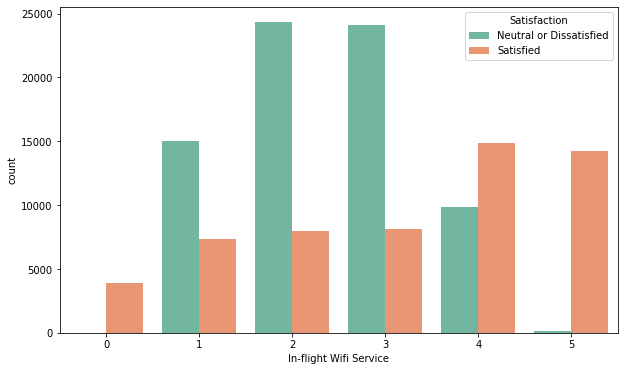

In [37]:
plt.figure(figsize = (10,6))
sns.countplot(data=airline,x='In-flight Wifi Service',hue='Satisfaction',palette='Set2')

### The more satisfied the customer with In-flight Wifi Service the more satisfied with the airline 

<AxesSubplot:xlabel='In-flight Entertainment', ylabel='count'>

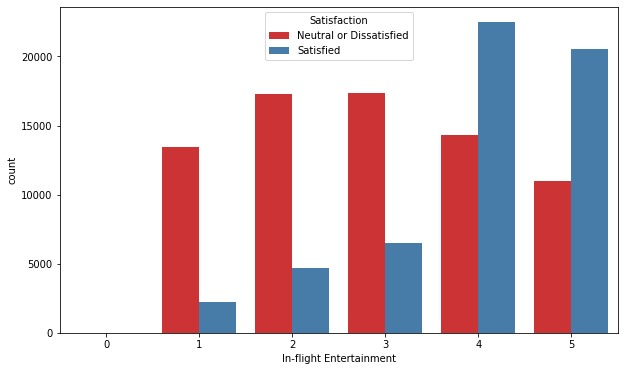

In [38]:
plt.figure(figsize = (10,6))
sns.countplot(data=airline,x='In-flight Entertainment',hue='Satisfaction',palette='Set1')

### The more satisfied the customer with In-flight Entertainment the more satisfied with the airline 

<AxesSubplot:xlabel='Baggage Handling', ylabel='count'>

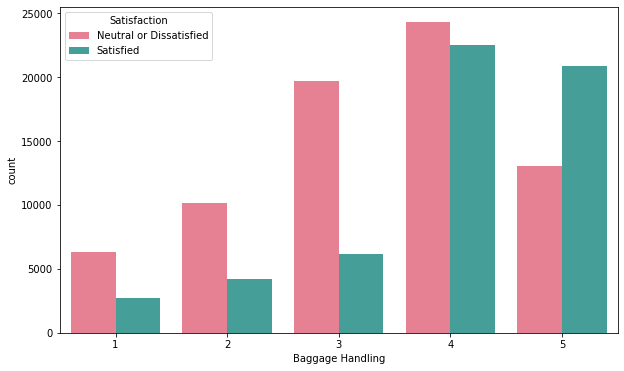

In [39]:
plt.figure(figsize = (10,6))
sns.countplot(data=airline,x='Baggage Handling',hue='Satisfaction',palette='husl')

### The more satisfied the customer with Ease of Online Booking the more satisfied with the airline 

### The more satisfied the customer with one of the following features the more satisfied in general 
##### ('Departure and Arrival Time Convenience', 'Ease of Online Booking','Check-in Service', 'Online Boarding','On-board Service'
##### 'Seat Comfort', 'Leg Room Service', 'Cleanliness','Food and Drink', 'In-flight Service', 'In-flight Wifi Service'
##### 'In-flight Entertainment' ,and 'Baggage Handling')


# Encoding 

In [40]:
airline['Gender'].value_counts()

Female    65899
Male      63981
Name: Gender, dtype: int64

In [41]:
airline['Customer Type'].value_counts()

Returning     106100
First-time     23780
Name: Customer Type, dtype: int64

In [42]:
airline['Type of Travel'].value_counts()

Business    89693
Personal    40187
Name: Type of Travel, dtype: int64

In [43]:
airline['Class'].value_counts()

Business        62160
Economy         58309
Economy Plus     9411
Name: Class, dtype: int64

In [44]:
airline['Satisfaction'].value_counts()

Neutral or Dissatisfied    73452
Satisfied                  56428
Name: Satisfaction, dtype: int64

In [45]:
gender_le=LabelEncoder()
Customer_Type_le=LabelEncoder()
Type_of_Travel=LabelEncoder()
Class=LabelEncoder()
Satisfaction=LabelEncoder()

In [46]:
#convert categorial data to numeric
airline['Gender']=gender_le.fit_transform(airline['Gender'])
airline['Customer Type']=Customer_Type_le.fit_transform(airline['Customer Type'])
airline['Type of Travel']=Type_of_Travel.fit_transform(airline['Type of Travel'])
airline['Class']=Class.fit_transform(airline['Class'])
airline['Satisfaction']=Satisfaction.fit_transform(airline['Satisfaction'])

In [47]:
airline.head(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,1,48,0,0,0,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,0
1,2,0,35,1,0,0,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,1
2,3,1,41,1,0,0,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,1
3,4,1,50,1,0,0,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,1
4,5,0,49,1,0,0,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,1
5,6,1,43,1,0,0,3788,0,0.0,4,...,4,4,4,3,3,4,4,4,4,1
6,7,1,43,1,0,0,1963,0,0.0,3,...,5,5,5,4,5,5,3,5,5,1
7,8,0,60,1,0,0,853,0,3.0,3,...,3,4,4,4,4,3,4,3,3,1
8,9,1,50,1,0,0,2607,0,0.0,1,...,4,3,4,3,3,4,4,4,4,0
9,10,0,38,1,0,0,2822,13,0.0,2,...,5,4,5,4,2,5,2,5,5,1


In [48]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  int64  
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  int64  
 4   Type of Travel                          129880 non-null  int64  
 5   Class                                   129880 non-null  int64  
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129880 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

# Outliers

## Detect Ouliers 

ID                                           AxesSubplot(0.125,0.772143;0.168478x0.107857)
Gender                                    AxesSubplot(0.327174,0.772143;0.168478x0.107857)
Age                                       AxesSubplot(0.529348,0.772143;0.168478x0.107857)
Customer Type                             AxesSubplot(0.731522,0.772143;0.168478x0.107857)
Type of Travel                               AxesSubplot(0.125,0.642714;0.168478x0.107857)
Class                                     AxesSubplot(0.327174,0.642714;0.168478x0.107857)
Flight Distance                           AxesSubplot(0.529348,0.642714;0.168478x0.107857)
Departure Delay                           AxesSubplot(0.731522,0.642714;0.168478x0.107857)
Arrival Delay                                AxesSubplot(0.125,0.513286;0.168478x0.107857)
Departure and Arrival Time Convenience    AxesSubplot(0.327174,0.513286;0.168478x0.107857)
Ease of Online Booking                    AxesSubplot(0.529348,0.513286;0.168478x0.107857)

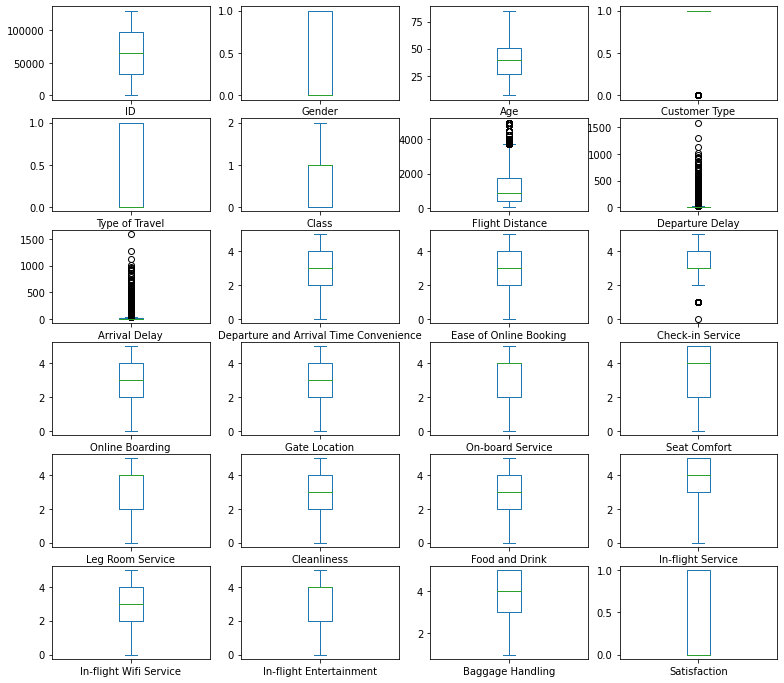

In [49]:
airline.plot(kind="box", subplots=True, layout=(6,4), figsize=(13,12))

## Removing Outliers

In [50]:
airline.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

## Removing Flight Distance Ouliers 

### Distribution Before Removing Outliers 

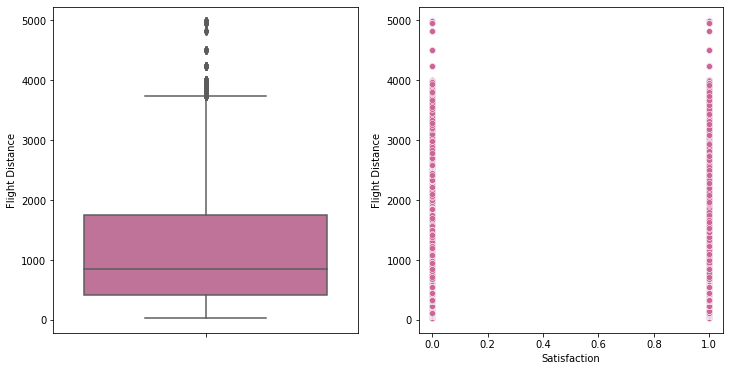

In [51]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=airline,y='Flight Distance',color='#cc6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=airline,x='Satisfaction',y='Flight Distance',color='#cc6699')
plt.show()

In [52]:
x=airline[airline['Flight Distance']>4000]
x.shape

(78, 24)

In [53]:
airline=airline[airline['Flight Distance']<=4000]

### Distribution After Removing Outliers 

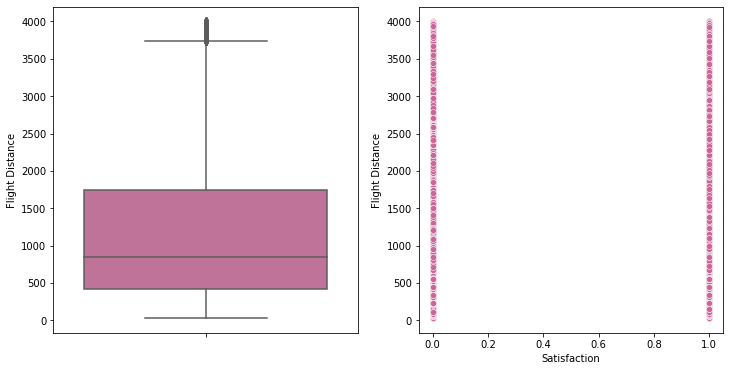

In [54]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=airline,y='Flight Distance',color='#cc6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=airline,x='Satisfaction',y='Flight Distance',color='#cc6699')
plt.show()

### Removing Outliers Didn't Change The Distribution

## Removing Departure Delay Ouliers 

### Distribution Before Removing Outliers 

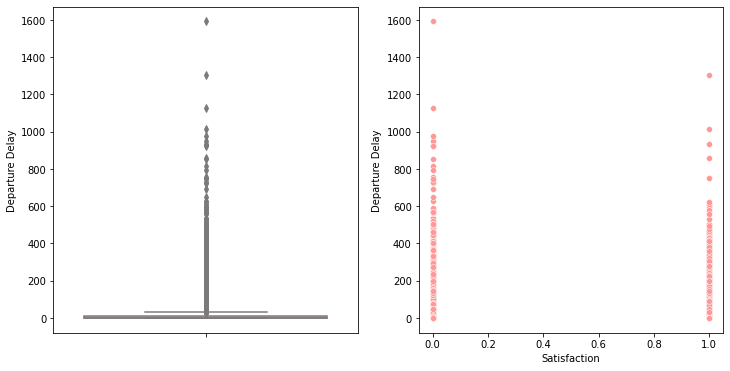

In [55]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=airline,y='Departure Delay',color='#ff9999')
plt.subplot(1, 2, 2)
sns.scatterplot(data=airline,x='Satisfaction',y='Departure Delay',color='#ff9999')
plt.show()

In [56]:
x=airline[airline['Departure Delay']>600]
x.shape

(24, 24)

In [57]:
airline=airline[airline['Departure Delay']<=600]

### Distribution After Removing Outliers 

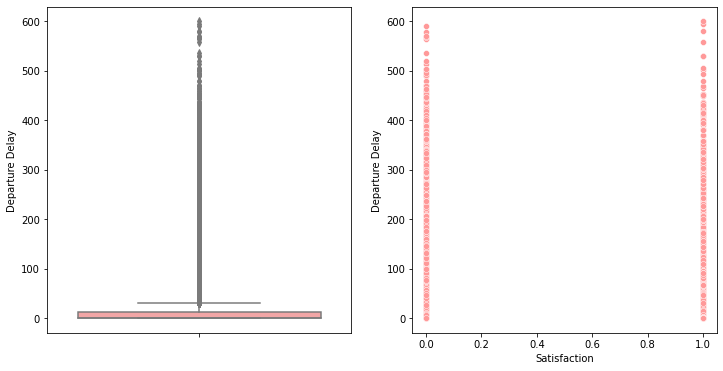

In [58]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=airline,y='Departure Delay',color='#ff9999')
plt.subplot(1, 2, 2)
sns.scatterplot(data=airline,x='Satisfaction',y='Departure Delay',color='#ff9999')
plt.show()

### Removing Outliers Didn't Change The Distribution

## Removing Arrival Delay Ouliers 

### Distribution Before Removing Outliers 

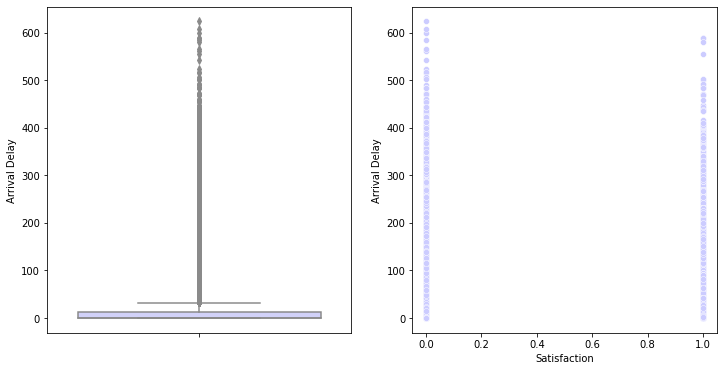

In [59]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=airline,y='Arrival Delay',color='#ccccff')
plt.subplot(1, 2, 2)
sns.scatterplot(data=airline,x='Satisfaction',y='Arrival Delay',color='#ccccff')
plt.show()

In [60]:
x=airline[airline['Arrival Delay']>=500]
x.shape

(18, 24)

In [61]:
airline=airline[airline['Arrival Delay']<500]

### Distribution After Removing Outliers 

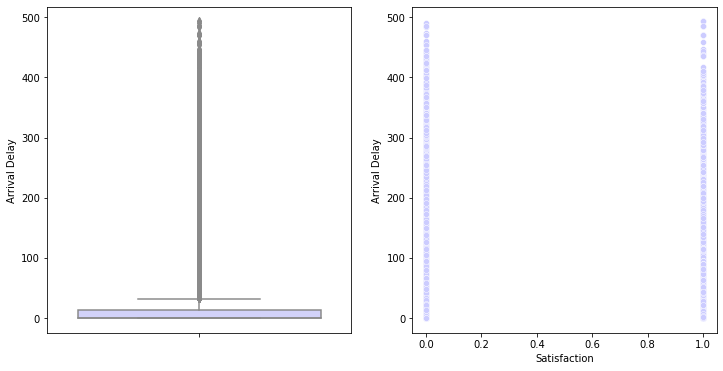

In [62]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=airline,y='Arrival Delay',color='#ccccff')
plt.subplot(1, 2, 2)
sns.scatterplot(data=airline,x='Satisfaction',y='Arrival Delay',color='#ccccff')
plt.show()

### Removing Outliers Didn't Change The Distribution

In [63]:
airline.shape

(129760, 24)

In [64]:
airline.drop('ID',axis=1,inplace=True)

In [65]:
airline.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [66]:
airline.drop('Gate Location',axis=1,inplace=True)
airline.drop('Gender',axis=1,inplace=True)
airline.drop('Flight Distance',axis=1,inplace=True)
airline.drop('Departure Delay',axis=1,inplace=True)
airline.drop('Arrival Delay',axis=1,inplace=True)

# Modeling 

## Splitting Data 

In [67]:
x = airline.drop(['Satisfaction'] , axis = 1).values
y= airline['Satisfaction' ].values
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state=42)

## Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
lr = LogisticRegression(C = 100)

In [70]:
lr.fit(x_train , y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=100)

In [71]:
lr.score(x_train , y_train)

0.8732178637484587

In [72]:
lr.score(x_test , y_test)

0.8741137484586929

In [73]:
y_pred = lr.predict(x_test)
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": y_pred})
data.head(10)

,Y_test,Y_pred
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
5,1,1
6,0,0
7,1,1
8,1,1
9,0,0


## KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
knn = KNeighborsClassifier(n_neighbors=9)

In [76]:
knn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=9)

In [77]:
knn.score(x_train , y_train)

0.9301498921085081

In [78]:
knn.score(x_test , y_test)

0.9149969173859432

In [79]:
y_pred = knn.predict(x_test)
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": y_pred})
data.head(10)

,Y_test,Y_pred
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
5,1,1
6,0,0
7,1,1
8,1,1
9,0,0
